## Recommender Systems

A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that provide suggestions for items that are most pertinent to a particular user. Typically, the suggestions refer to various decision-making processes, such as what product to purchase, what music to listen to, or what online news to read. Recommender systems are particularly useful when an individual needs to choose an item from a potentially overwhelming number of items that a service may offer.

Recommender systems are used in a variety of areas, with commonly recognised examples taking the form of playlist generators for video and music services, product recommenders for online stores, or content recommenders for social media platforms and open web content recommenders. These systems can operate using a single input, like music, or multiple inputs within and across platforms like news, books and search queries. There are also popular recommender systems for specific topics like restaurants and online dating. Recommender systems have also been developed to explore research articles and experts, collaborators, and financial services

![](https://thingsolver.com/wp-content/uploads/ph1-1024x647.png)

Most of the e-commerce companies such as Amazon, Flipkart, Swiggy, HealthKart are most likely to use recommender systems since this is exactly how a user would end up discovering a product or a dish they might like but they may not have heard of since there are so much products or dishes to choose from.


In this notebook we are gonna be looking at the restaurant data of Bengaluru city which is in India and try to make a system that recommeends restaurants to the user based on ratings.

![](https://1000logos.net/wp-content/uploads/2021/06/Zomato-logo.png)

Zomato (/zoʊmɑːtoʊ/) is an Indian multinational restaurant aggregator and food delivery company founded by **Deepinder Goyal** and **Pankaj Chaddah** in **2008**. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

#supress warnings
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('../input/zomato-bangalore-restaurants-2022/BangaloreZomatoData.csv')
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              8923 non-null   object
 1   URL               8923 non-null   object
 2   Cuisines          8923 non-null   object
 3   Area              8923 non-null   object
 4   Timing            5820 non-null   object
 5   Full_Address      8923 non-null   object
 6   PhoneNumber       8923 non-null   object
 7   IsHomeDelivery    8923 non-null   int64 
 8   isTakeaway        8923 non-null   int64 
 9   isIndoorSeating   8923 non-null   int64 
 10  isVegOnly         8923 non-null   int64 
 11  Dinner Ratings    8923 non-null   object
 12  Dinner Reviews    8923 non-null   int64 
 13  Delivery Ratings  8923 non-null   object
 14  Delivery Reviews  8923 non-null   int64 
 15  KnownFor          258 non-null    object
 16  PopularDishes     1535 non-null   object
 17  PeopleKnownFor

There are some Null values in the last few columns. There are some columns that we can drop since they won't be much helpful.

In [4]:
df.describe()

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
count,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000
mean,0.997871,0.660092,0.442676,0.072285,157.106018,2014.709403,340.225261
std,0.046098,0.473704,0.496731,0.258974,731.834227,5524.430542,308.338943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,42.000000,150.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,279.000000,250.000000
75%,1.000000,1.000000,1.000000,0.000000,43.000000,1493.500000,400.000000
max,1.000000,1.000000,1.000000,1.000000,26500.000000,99600.000000,4200.000000


The average cost goes from 50 bucks and goes all the way upto 4200 and the average of average cost is 340 bucks. 

The reviews are none in some of the cases however the maximum number of reviews is 99,600 for delivery reviews however for dinner (dine-in) reviews there are 26,500 reviews and purely looking at numbers we can either concur that:-
* people are getting food delivered more than they dine-in or 
* the people who dine-in don't leave as much reviews.

In [5]:
np.around(df.corr()[df.corr()>0.0],3)

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Reviews,Delivery Reviews,AverageCost
IsHomeDelivery,1.000,0.064,0.041,0.013,0.010,0.016,NaN
isTakeaway,0.064,1.000,0.582,0.128,0.126,0.137,0.257
isIndoorSeating,0.041,0.582,1.000,0.109,0.228,0.167,0.516
isVegOnly,0.013,0.128,0.109,1.000,0.007,0.049,NaN
Dinner Reviews,0.010,0.126,0.228,0.007,1.000,0.201,0.470
Delivery Reviews,0.016,0.137,0.167,0.049,0.201,1.000,0.074
AverageCost,NaN,0.257,0.516,NaN,0.470,0.074,1.000


1. From the correlation matrix above, we see that Avge Cost and Indoor seating has a positive correlation which makes sense.
2. Similarly, it also makes sense that if the restaurant offers Take Away, the avge cost will be less. 
3. The avge cost and the dinner reviews also has a positive correlation which means reviews are also affecting the average cost. 

                        Correlation among various features is visible in the heatmap above.

In [6]:
corr = df.corr()
corr = np.around(corr[corr > 0.0],3)
fig = px.imshow(corr, 
                text_auto=True, template='simple_white',
                color_continuous_scale=px.colors.sequential.Viridis, 
                aspect="auto")
fig.update_xaxes(side="top")
fig.show()

In [7]:
#df.drop(['URL', 'Full_Address','PhoneNumber'], axis= 1, inplace=True)
df.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In the above column we are removing those columns that may not be so useful for our analysis

In [8]:
df.dtypes

Name                object
URL                 object
Cuisines            object
Area                object
Timing              object
Full_Address        object
PhoneNumber         object
IsHomeDelivery       int64
isTakeaway           int64
isIndoorSeating      int64
isVegOnly            int64
Dinner Ratings      object
Dinner Reviews       int64
Delivery Ratings    object
Delivery Reviews     int64
KnownFor            object
PopularDishes       object
PeopleKnownFor      object
AverageCost          int64
dtype: object

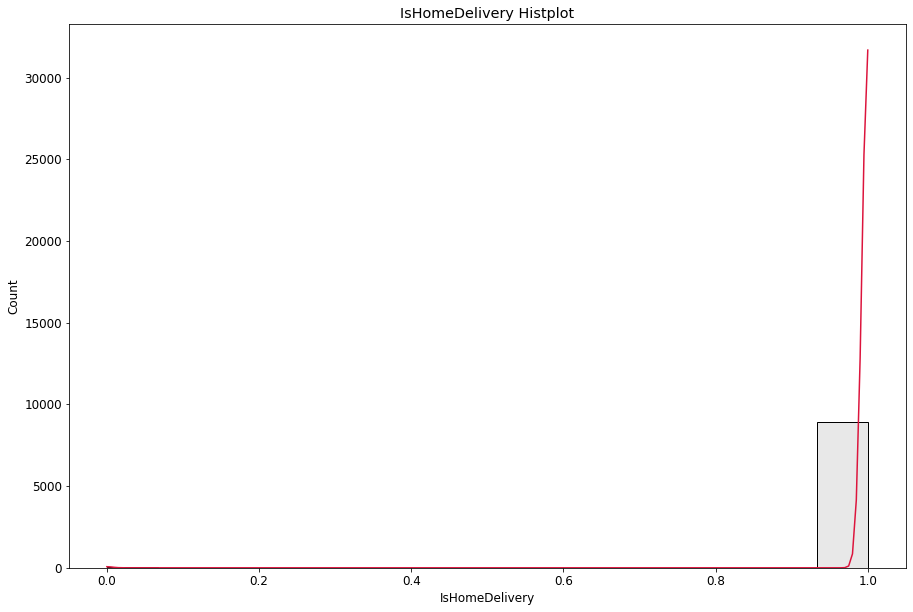

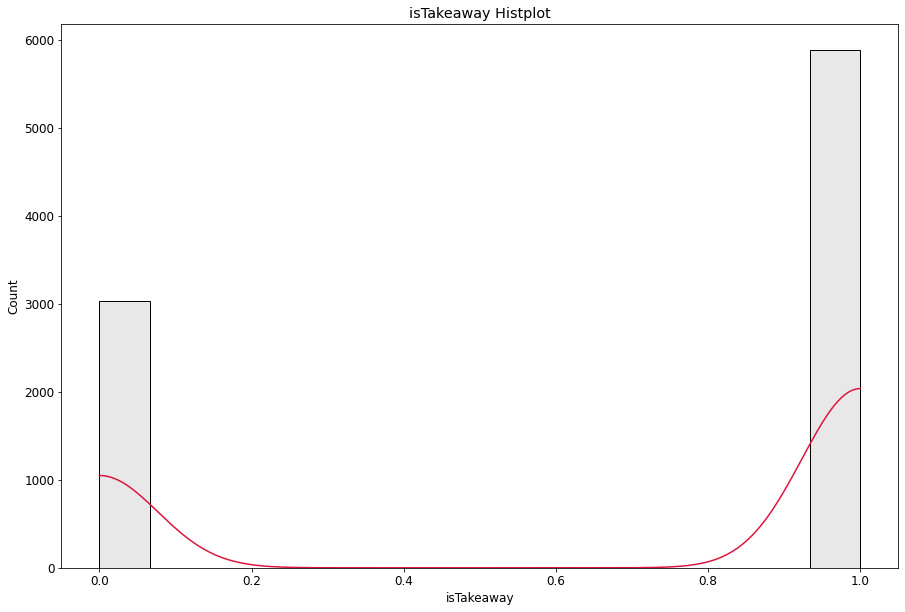

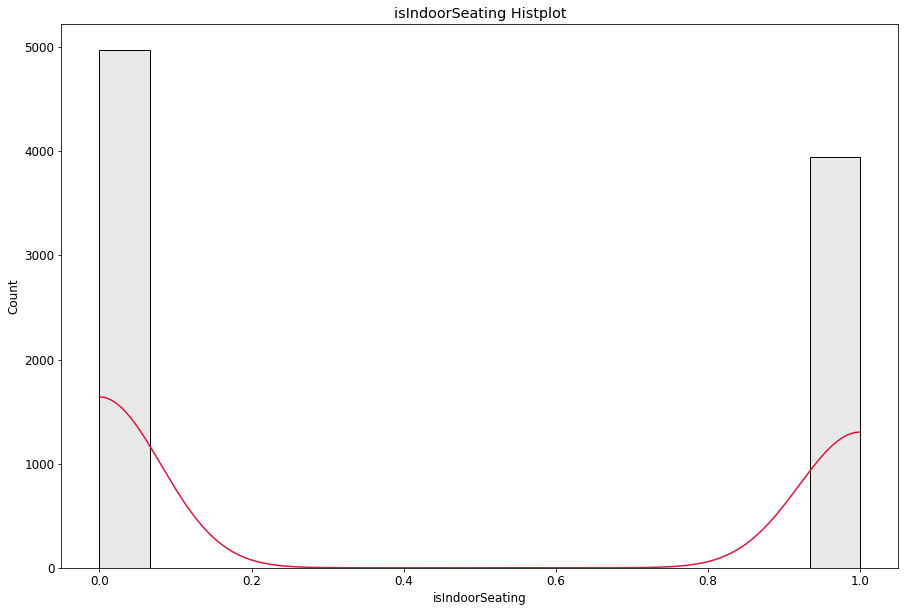

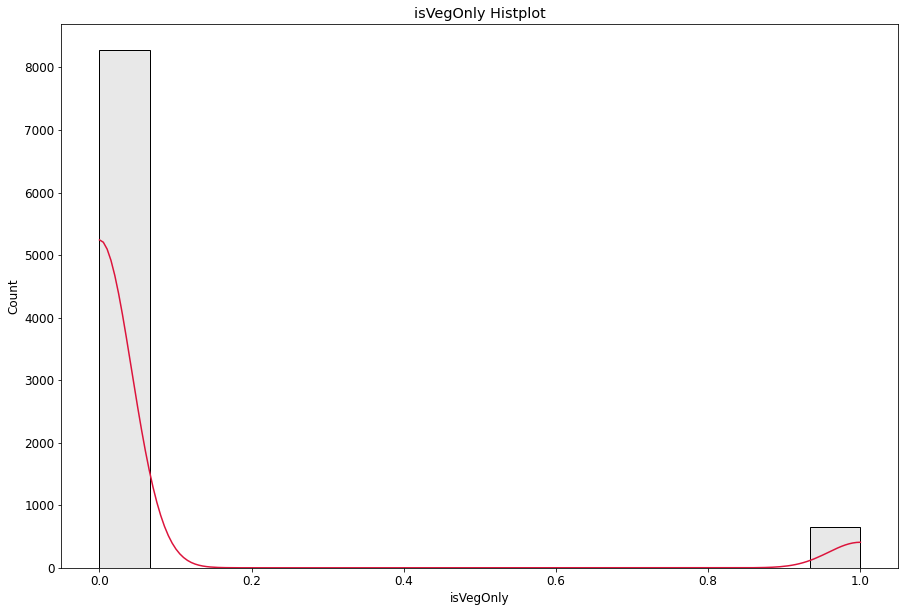

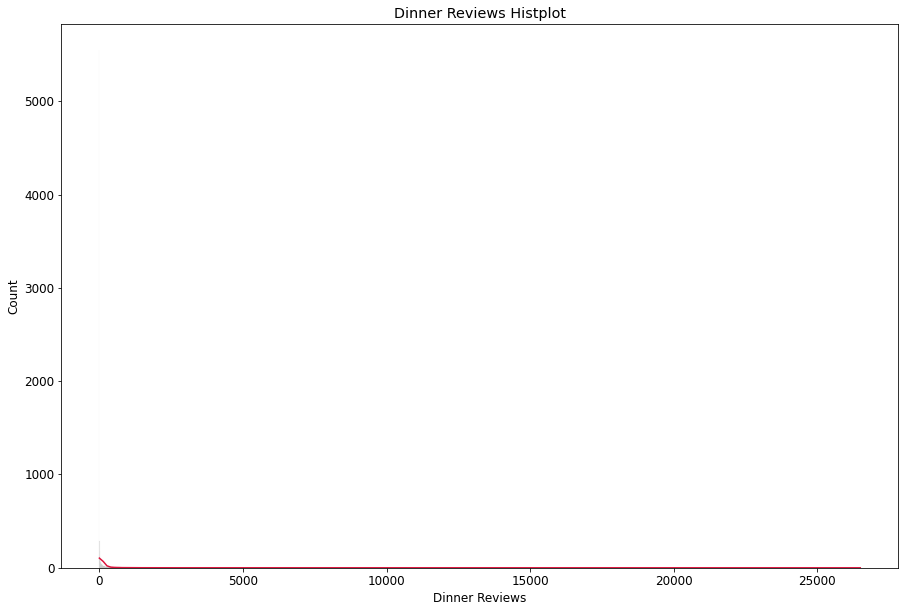

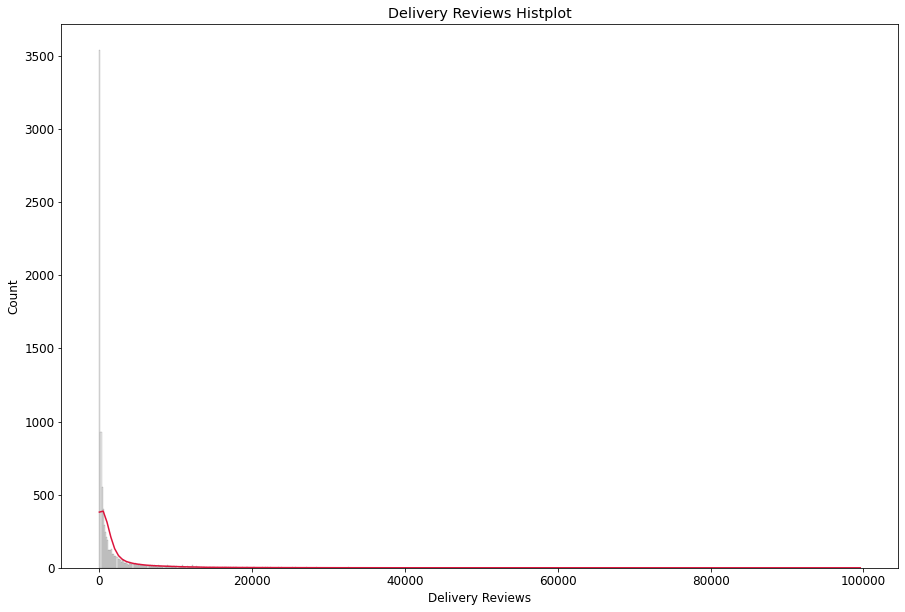

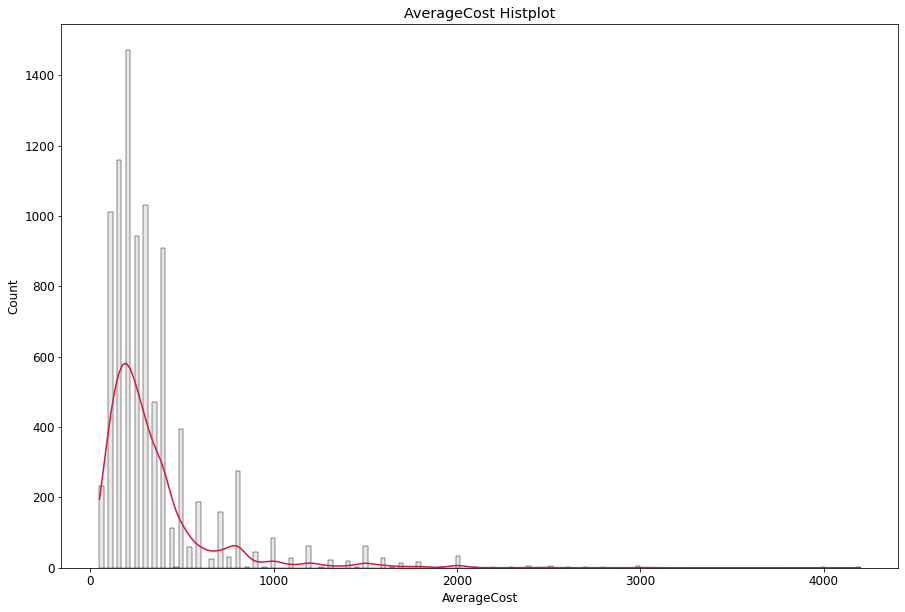

In [9]:
for i in df.select_dtypes(include=['int64']):
    ax= sns.histplot(df.select_dtypes(include=['int64'])[i],  
             kde=True, color='lightgray')
    ax.lines[0].set_color('crimson')
    plt.title(i+" "+'Histplot')
    plt.show();

*Analysis from the above charts*:-
1. More restaurants in Bangalore are doing the home delivery than the takeaways. Restaurants are focussing more on delivering the convenience to the customers as opposed to having the people walk up to the restaurants to pick up their order.
2. Veg Only restaurants are very less in Bengaluru, India,
3. Dine-in places are less which relates with our first point that states there are more restaurants that like to deliver.
4. Dinner Reviews are less than Delivery reviews. The dinner reviews are bound to be less just by the comparison of the deliveries being done in the area.
5. Average Cost is within the Rs 300-400 range.

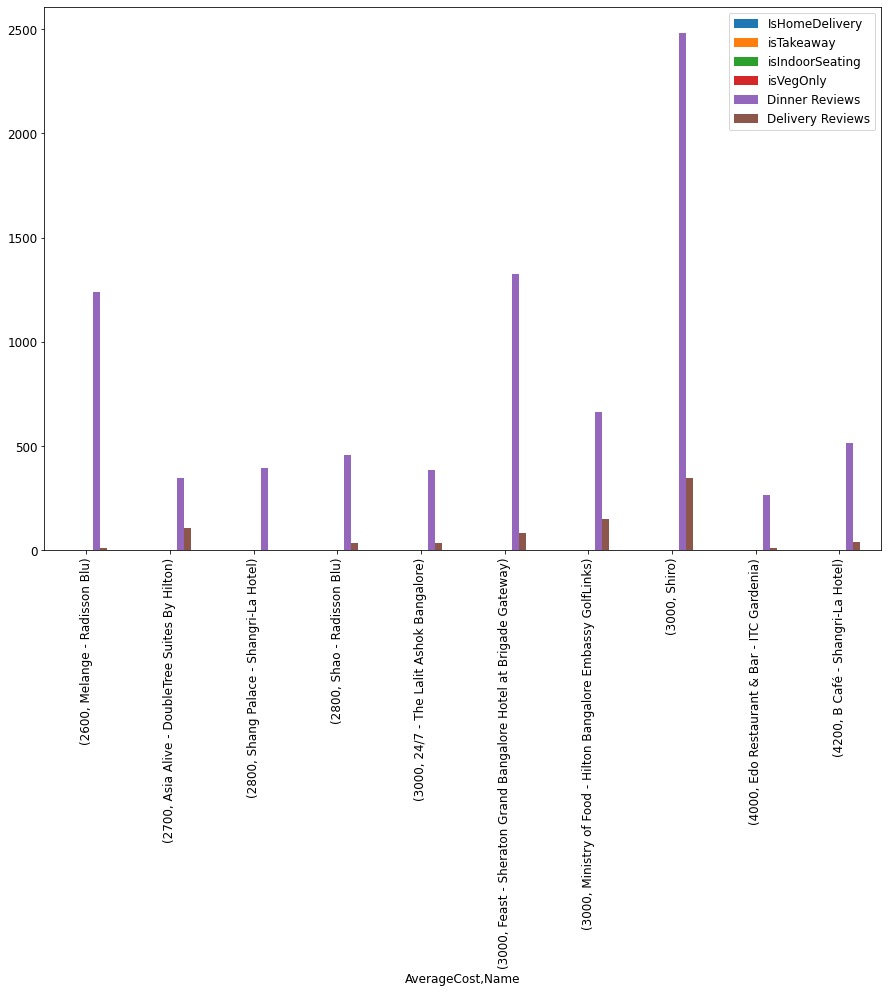

In [10]:
df1 = df.copy().sort_values(by='AverageCost',ascending= False).drop_duplicates('Name').head(10)
df1.groupby(['AverageCost','Name']).mean().plot.bar();

In [11]:
df1.groupby(['AverageCost', 'Name']).sum()

IsHomeDelivery  \
AverageCost Name                                                                 
2600        Melange - Radisson Blu                                           1   
2700        Asia Alive - DoubleTree Suites By Hilton                         1   
2800        Shang Palace - Shangri-La Hotel                                  1   
            Shao - Radisson Blu                                              1   
3000        24/7 - The Lalit Ashok Bangalore                                 1   
            Feast - Sheraton Grand Bangalore Hotel at Briga...               1   
            Ministry of Food - Hilton Bangalore Embassy Gol...               1   
            Shiro                                                            1   
4000        Edo Restaurant & Bar - ITC Gardenia                              1   
4200        B Café - Shangri-La Hotel                                        1   

                                                                isTakeaway  \
AverageCost Name                                                             
2600        Melange - Radisson Blu                                       0   
2700        Asia Alive - DoubleTree Suites By Hilton                     0   
2800        Shang Palace - Shangri-La Hotel                              0   
            Shao - Radisson Blu                                          1   
3000        24/7 - The Lalit Ashok Bangalore                             0   
            Feast - Sheraton Grand Bangalore Hotel at Briga...           1   
            Ministry of Food - Hilton Bangalore Embassy Gol...           1   
            Shiro                                                        0   
4000        Edo Restaurant & Bar - ITC Gardenia                          0   
4200        B Café - Shangri-La Hotel                                    0   

                                                                isIndoorSeating  \
AverageCost Name                                                                  
2600        Melange - Radisson Blu                                            1   
2700        Asia Alive - DoubleTree Suites By Hilton                          1   
2800        Shang Palace - Shangri-La Hotel                                   1   
            Shao - Radisson Blu                                               1   
3000        24/7 - The Lalit Ashok Bangalore                                  1   
            Feast - Sheraton Grand Bangalore Hotel at Briga...                1   
            Ministry of Food - Hilton Bangalore Embassy Gol...                1   
            Shiro                                                             1   
4000        Edo Restaurant & Bar - ITC Gardenia                               1   
4200        B Café - Shangri-La Hotel                                         1   

                                                                isVegOnly  \
AverageCost Name                                                            
2600        Melange - Radisson Blu                                      0   
2700        Asia Alive - DoubleTree Suites By Hilton                    0   
2800        Shang Palace - Shangri-La Hotel                             0   
            Shao - Radisson Blu                                         0   
3000        24/7 - The Lalit Ashok Bangalore                            0   
            Feast - Sheraton Grand Bangalore Hotel at Briga...          0   
            Ministry of Food - Hilton Bangalore Embassy Gol...          0   
            Shiro                                                       0   
4000        Edo Restaurant & Bar - ITC Gardenia                         0   
4200        B Café - Shangri-La Hotel                                   0   

                                                                Dinner Reviews  \
AverageCost Name                                                                 
2600        Melange - Radisson Blu                      

In [12]:
#Restaurant wise average cost in Bengaluru Location
fig = px.bar(df1, x='Name', template='simple_white',y='AverageCost', color= 'Name', text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

The restaurants having the highest average cost are 
* B-Cafe, 
* Edo Restaurant & Bar, 
* Shiro
* 24/7 - The Lalit Ashok Bangalore
* Feast - Sheraton Grand Bangalore Hotel at Brigade Gateway

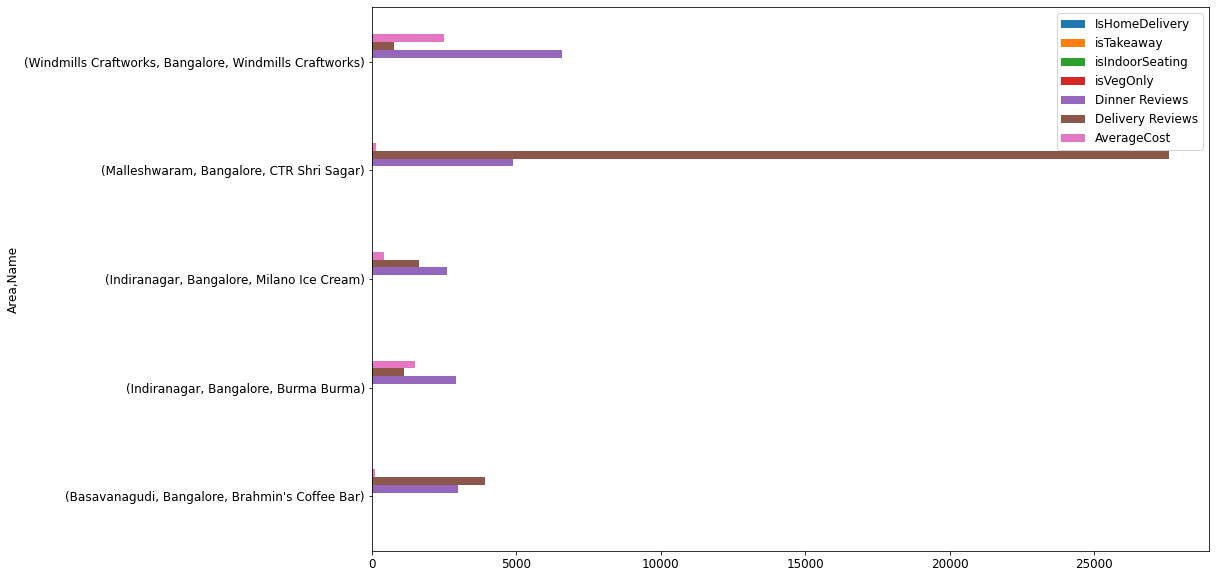

In [13]:
df2 = df.copy().sort_values(by='Dinner Ratings',ascending= False).drop_duplicates('Name').head(5)
df2.groupby(['Area','Name']).sum().plot.barh();

The restaurants with the highest dine-in ratings are 
* Brahmin's Coffee Bar
* Windmills Craftworks
* Milano Ice Cream
* Burma Burma

Restaurants with Highest Dinner Ratings

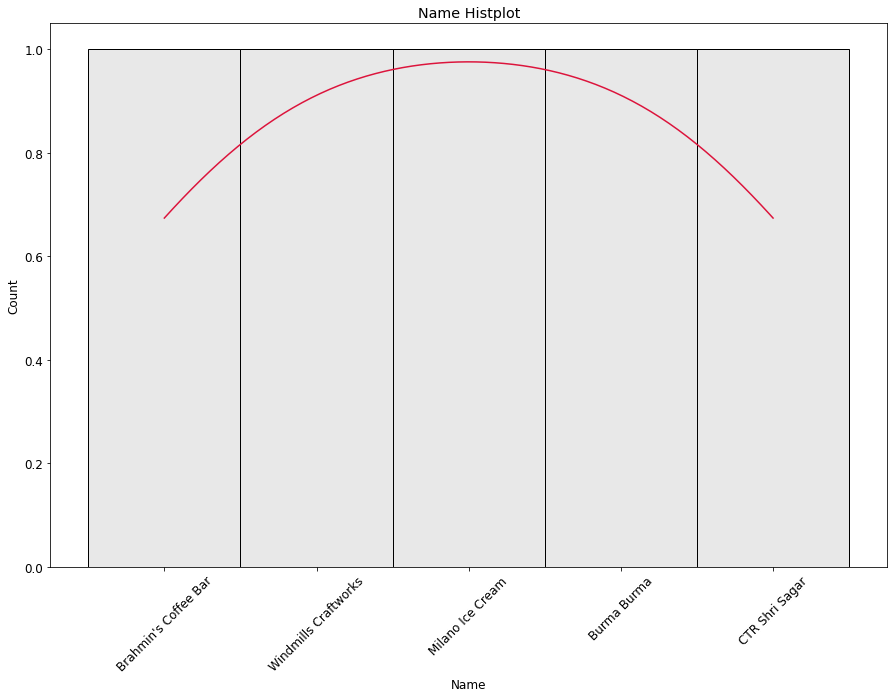

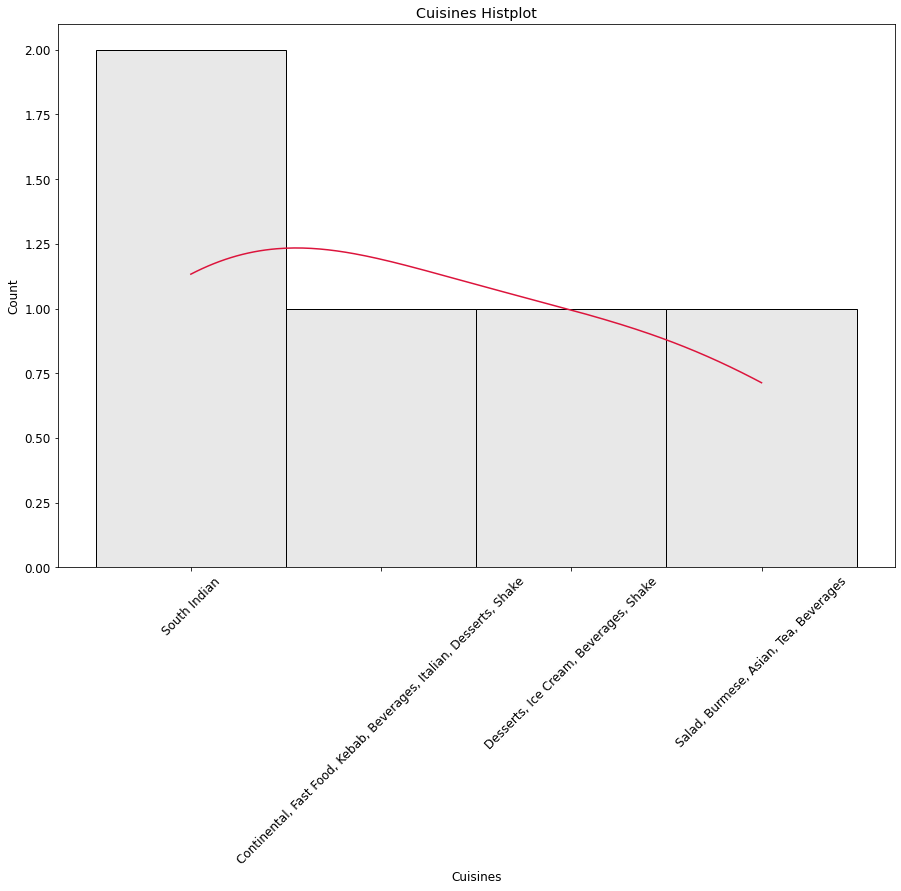

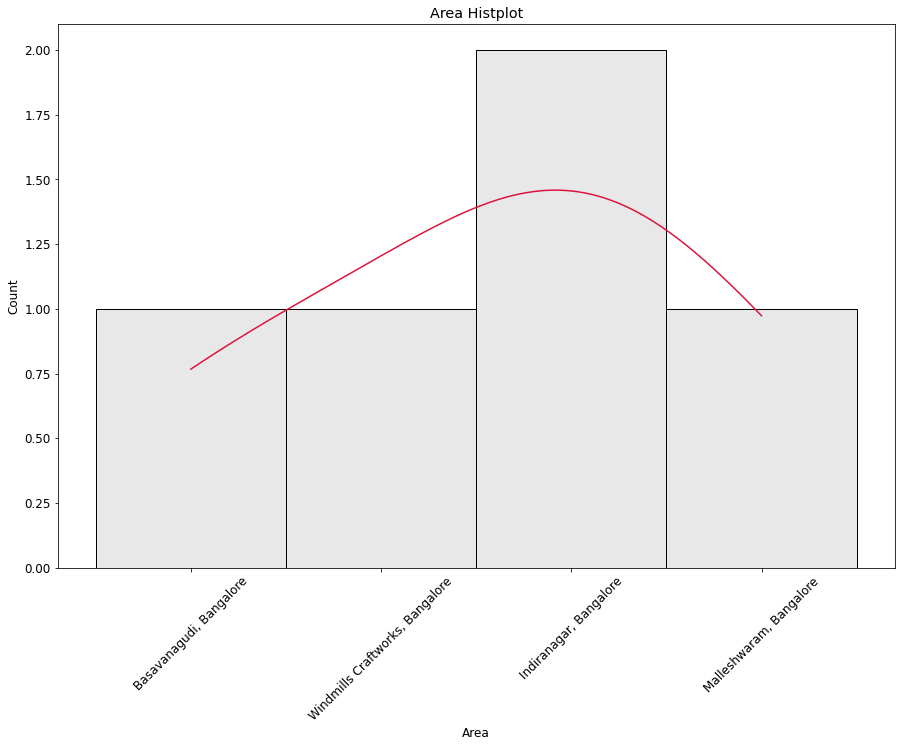

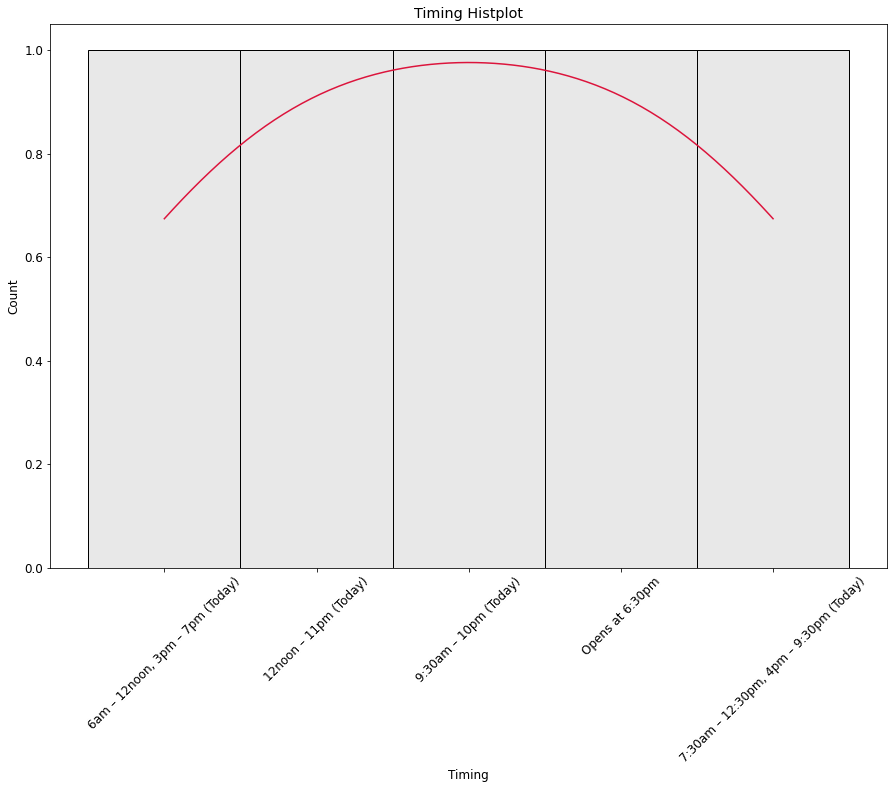

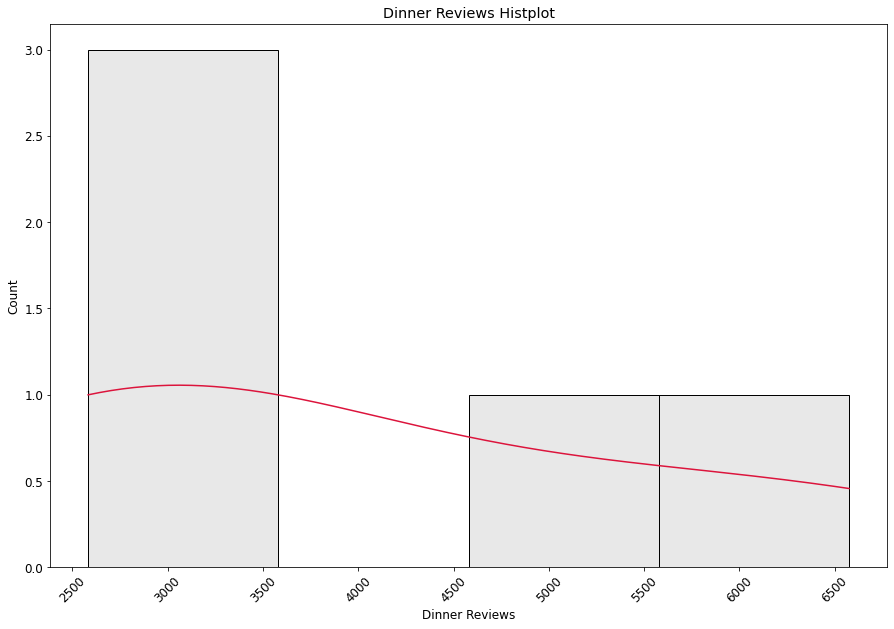

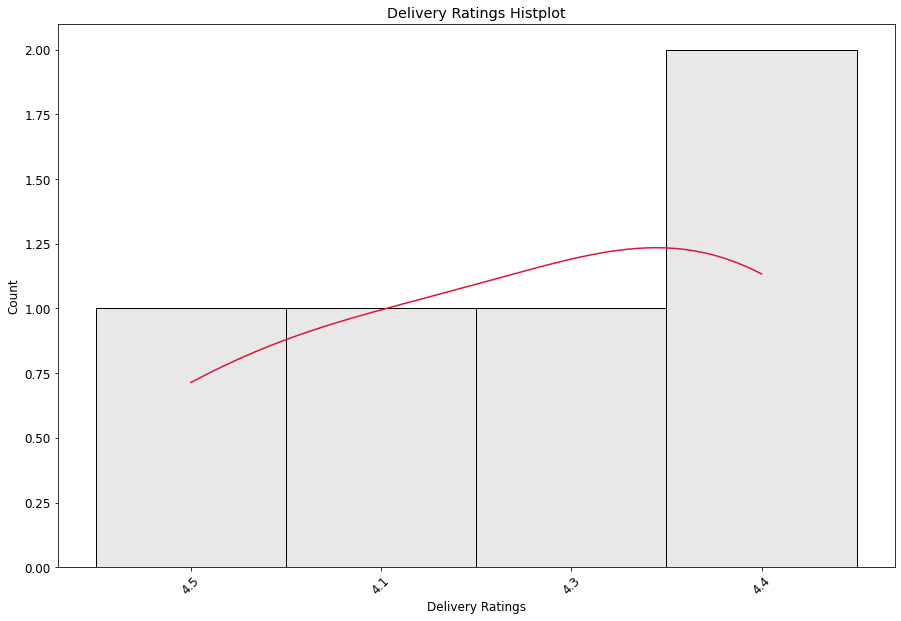

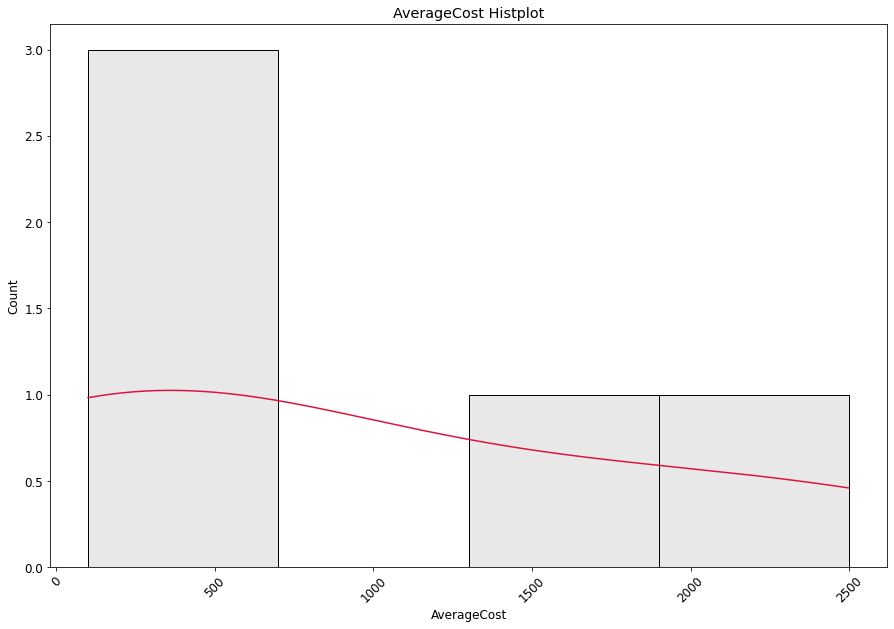

In [14]:
for i in df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'AverageCost']]:
    
    ax= sns.histplot(df2[['Name', 'Cuisines', 'Area', 'Timing', 'Dinner Reviews',
       'Delivery Ratings', 'PopularDishes', 'AverageCost']][i],  
             kde=True, color='lightgray')
    ax.lines[0].set_color('crimson')
    plt.title(i+" "+'Histplot')
    plt.xticks(rotation = 45)
    plt.show();

In [15]:
# Converting Ratings to float from object datatype
df['Dinner Ratings'] = df['Dinner Ratings'].str.replace('-', '0').astype(np.float64)
df['Delivery Ratings'] = df['Delivery Ratings'].str.replace('-', '0').astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              8923 non-null   object 
 1   URL               8923 non-null   object 
 2   Cuisines          8923 non-null   object 
 3   Area              8923 non-null   object 
 4   Timing            5820 non-null   object 
 5   Full_Address      8923 non-null   object 
 6   PhoneNumber       8923 non-null   object 
 7   IsHomeDelivery    8923 non-null   int64  
 8   isTakeaway        8923 non-null   int64  
 9   isIndoorSeating   8923 non-null   int64  
 10  isVegOnly         8923 non-null   int64  
 11  Dinner Ratings    8923 non-null   float64
 12  Dinner Reviews    8923 non-null   int64  
 13  Delivery Ratings  8923 non-null   float64
 14  Delivery Reviews  8923 non-null   int64  
 15  KnownFor          258 non-null    object 
 16  PopularDishes     1535 non-null   object 


In [16]:
#Which restaurant is famous in different localities in Kolkata?
df.groupby(['Area','Name']).sum().head(15)

IsHomeDelivery  \
Area                                               Name                                    
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall                  1   
                                                   Fruitify                            1   
                                                   ROYCE' Chocolate                    1   
                                                   Smoor                               1   
                                                   Yauatcha                            1   
153 Biere Street, Bangalore                        SLV Corner Restaurant               1   
5th Avenue, Brigade Road, Bangalore                Thai House                          1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                       1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                     1   
Aloft Hotel, Whitefield, Bangalore                 Dot.yum - Aloft Hotel               1   
                                                   Estia - Aloft Hotel                 1   
Ascendas Park Square, Whitefield, Bangalore        Amoeba Sports Bar                   1   
                                                   Barbeque Nation                     1   
                                                   California Burrito                  1   
                                                   Deccan Paradise                     1   

                                                                          isTakeaway  \
Area                                               Name                                
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall              1   
                                                   Fruitify                        1   
                                                   ROYCE' Chocolate                1   
                                                   Smoor                           1   
                                                   Yauatcha                        1   
153 Biere Street, Bangalore                        SLV Corner Restaurant           1   
5th Avenue, Brigade Road, Bangalore                Thai House                      1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                   1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                 1   
Aloft Hotel, Whitefield, Bangalore                 Dot.yum - Aloft Hotel           1   
                                                   Estia - Aloft Hotel             0   
Ascendas Park Square, Whitefield, Bangalore        Amoeba Sports Bar               1   
                                                   Barbeque Nation                 1   
                                                   California Burrito              1   
                                                   Deccan Paradise                 1   

                                                                          isIndoorSeating  \
Area                                               Name                                     
1 MG Road Mall, MG Road, Bangalore                 Bakery By Foodhall                   0   
                                                   Fruitify                             1   
                                                   ROYCE' Chocolate                     0   
                                                   Smoor                                0   
                                                   Yauatcha                             1   
153 Biere Street, Bangalore                        SLV Corner Restaurant                1   
5th Avenue, Brigade Road, Bangalore                Thai House                           1   
Abhimaani Vasathi, Bangalore                       Coastal Spice                        1   
Aloft Bengaluru Cessna Business Park, Kadubeesa... Nandhini Deluxe                

In [17]:
for i in df[['Dinner Ratings','Delivery Ratings', 'AverageCost']]:
    fig = px.histogram(df[['Dinner Ratings','Delivery Ratings', 'AverageCost']], 
                       x=i, 
                       template='simple_white')
    fig.show()

**Note** :- 

In case of zero rating, it could either be the customer not giving any rating or he may have actually given the zero rating.

In [18]:
#Which cuisines are the most famous in different localities?
df.groupby(['Area','Cuisines']).sum()

IsHomeDelivery  \
Area                               Cuisines                                                             
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                                 1   
                                   Bakery, Desserts, Panini, Mexican, American                      1   
                                   Chinese, Asian, Seafood                                          1   
                                   Desserts                                                         1   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...               1   
...                                                                                               ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                       1   
                                   South Indian, Street Food, Chinese                               1   
                                   South Indian, Tea                                                1   
                                   Street Food                                                      3   
                                   Street Food, Arabian, North Indian, Mughlai, Se...               1   

                                                                                       isTakeaway  \
Area                               Cuisines                                                         
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                             1   
                                   Bakery, Desserts, Panini, Mexican, American                  1   
                                   Chinese, Asian, Seafood                                      1   
                                   Desserts                                                     1   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...           1   
...                                                                                           ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                   1   
                                   South Indian, Street Food, Chinese                           1   
                                   South Indian, Tea                                            1   
                                   Street Food                                                  2   
                                   Street Food, Arabian, North Indian, Mughlai, Se...           1   

                                                                                       isIndoorSeating  \
Area                               Cuisines                                                              
1 MG Road Mall, MG Road, Bangalore Bakery, Desserts                                                  0   
                                   Bakery, Desserts, Panini, Mexican, American                       0   
                                   Chinese, Asian, Seafood                                           1   
                                   Desserts                                                          0   
                                   Sandwich, Fast Food, Ice Cream, Desserts, Bever...                1   
...                                                                                                ...   
Yeshwantpur, Bangalore             South Indian, North Indian, Kebab, Biryani                        1   
                                   South Indian, Street Food, Chinese                                1   
                                   South Indian, Tea                                                 0   
                                   Street Food                                                       0   
                                   Street Food, Arabian, North Indian, Mughlai, Se...                0   

                            

In [19]:
#What is the highest rating restaurant for any particular cuisines?
fig = px.bar(df.groupby(['Cuisines']).sum().head(10), 
             x='Delivery Ratings', 
             template='simple_white', 
             title ='Ratings Of Various Cuisines')
fig.update_yaxes(categoryorder='total ascending')
fig.show();

In [20]:
#What is the highest rating restaurant for any particular cuisines?
df.groupby(['Cuisines']).mean().sort_values(by='Delivery Ratings', ascending=False)

,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
Cuisines,,,,,,,,,
"Beverages, Bubble Tea",1.0,0.0,0.0,0.0,0.0,0.0,4.6,195.0,250.0
"Bakery, Fast Food, Desserts, Beverages",1.0,1.0,0.0,0.0,0.0,0.0,4.6,674.0,350.0
"Street Food, Fast Food, Beverages, Coffee",1.0,1.0,1.0,0.0,4.4,370.0,4.6,244.0,400.0
Maharashtrian,1.0,1.0,1.0,1.0,4.2,195.0,4.5,834.0,250.0
Korean,1.0,1.0,1.0,0.0,4.1,251.0,4.5,578.0,800.0
...,...,...,...,...,...,...,...,...,...
"Bengali, Street Food",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
"Continental, Asian, Bar Food, Desserts, Beverages",1.0,1.0,1.0,0.0,4.2,1042.0,0.0,7.0,1700.0
"Mughlai, North Indian, Chinese, Biryani",1.0,1.0,1.0,0.0,3.0,19.0,0.0,0.0,1200.0


In [21]:
#What is the best restaurant for each category (Dine-In, Delivery, Takeaway, Vegetarian)
df[df.isIndoorSeating.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
231,Milano Ice Cream,https://www.zomato.com/bangalore/milano-ice-cr...,"Desserts, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",9:30am – 10pm (Today),"460, 2nd Cross, Krishna Temple Road, Indiranag...",+918041256483,1,1,1,0,4.9,2582,4.3,1642,Varieties of Gelato Ice Creams.,"Baileys Ice Cream, Extra Dark Chocolate, Vanil...","Bank for the Buck, Totally Worth it, Cozy Ambi...",400


In [22]:
#What is the best restaurant for each category (Delivery)
df[df.IsHomeDelivery.eq(1)].sort_values(by='Delivery Ratings', ascending=False).head(1)

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
5924,Apsara Ice Creams,https://www.zomato.com/bangalore/apsara-ice-cr...,"Ice Cream, Desserts","Kalyan Nagar, Bangalore",NaN,"Habitat 15, PG Building, 201, 15th C Main, HRB...",+919606826691,1,0,0,0,0.0,0,4.7,207,NaN,NaN,NaN,100


In [23]:
#What is the best restaurant for each category (Takeaway)
df[df.isTakeaway.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
231,Milano Ice Cream,https://www.zomato.com/bangalore/milano-ice-cr...,"Desserts, Ice Cream, Beverages, Shake","Indiranagar, Bangalore",9:30am – 10pm (Today),"460, 2nd Cross, Krishna Temple Road, Indiranag...",+918041256483,1,1,1,0,4.9,2582,4.3,1642,Varieties of Gelato Ice Creams.,"Baileys Ice Cream, Extra Dark Chocolate, Vanil...","Bank for the Buck, Totally Worth it, Cozy Ambi...",400


In [24]:
#What is the best restaurant for each category (Vegetarian)
df[df.isVegOnly.eq(1)].sort_values(by='Dinner Ratings', ascending=False).head(1)

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
3530,Brahmin's Coffee Bar,https://www.zomato.com/bangalore/brahmins-coff...,South Indian,"Basavanagudi, Bangalore","6am – 12noon, 3pm – 7pm (Today)","Ranga Rao Road, Basavanagudi, Bangalore",+919845030234,1,1,0,1,4.9,2976,4.5,3923,NaN,"Idli Chatni, Coffee Bar, Khara Bhath, Vada Com...","Best Idli, Breakfast Joint, Inexpensive, Good ...",100


In [25]:
#Reviews in General about the Bangalore Restaurants
reviews = df[pd.notnull(df.PeopleKnownFor)].PeopleKnownFor.values.tolist()
for i in range(1, len(reviews))[:20]:
    print(f'Review {i} - {reviews[i]} ')

Review 1 - Boneless Chicken Biryani, Ample Seating Area, Serving Size, Family Place, Relaxed Atmosphere, Delivery Person 
Review 2 - Great Recommendations, Nice Taste, Great Ambiance, Good Quantity, Excellent Food, Nice Food 
Review 3 - Value for Money, Packaging, Staff, Ambience, Food 
Review 4 - Elegantly Decorated, Great Recommendations, View, Location, Good Taste, Worth the Money 
Review 5 - Fresh Food with Good Quality, Worth the Money, Great Portions, Timely Service, Delicious Food 
Review 6 - Bang for the Buck, Cozy Ambiance, Nice Crowd, Low Price, Comfortable Seating, Good Atmosphere 
Review 7 - Casual Seating Area, Hygiene, Location, Friendly Staff, Spicy, Good Place 
Review 8 - Serving Size, Family Place, Decent Ambience, Good Quantity, Decent Place, Portion 
Review 9 - Good Packaging, Excellent Food, Spill Proof Packaging, Good Taste, Reasonable Price, Packing 
Review 10 - Value for Price, Customizations Available, Chirpy Crowd, Bang for the Buck, Nice Delivery, Good Portion

## Types of Recommendation Systems

### Collaborative filtering

One approach to the design of recommender systems that has wide use is collaborative filtering.[38] Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. The system generates recommendations using only information about rating profiles for different users or items. By locating peer users/items with a rating history similar to the current user or item, they generate recommendations using this neighborhood. Collaborative filtering methods are classified as memory-based and model-based. A well-known example of memory-based approaches is the user-based algorithm,[39] while that of model-based approaches is Matrix Factorization.

![](https://lh4.googleusercontent.com/tAgCYMrhIquk_x956HN4aF04SkymGfbdwTIr1M4wBD81cA6N5XZImB8EBsbmMs3k0pp5n36z1z1n77sMTRV9jxZ-j7fxp6BookRT8cTxdmsU-8gYdKrbAJBlWGGxtNLFGH2oYJrQ)

## Popularity Based Recommendation Systems 

Recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that. 

In [26]:
newdf = pd.DataFrame(df[df['Delivery Ratings']>4].groupby('Name').count().reset_index()
                         [['Name','Delivery Ratings']]).sort_values('Delivery Ratings', ascending=False)

In [27]:
populardf= newdf.merge(df, on='Name').drop_duplicates('Name').rename(columns={'Delivery Ratings_x':'Num_del_ratings'})
populardf['PopularDishes'].fillna(populardf[populardf['PopularDishes'].isnull()]['Cuisines'], inplace=True)

In [28]:
popular_df = populardf.head(100)
popular_df = popular_df.sort_values('Delivery Ratings_y', ascending=False)
popular_df.head()

,Name,Num_del_ratings,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings_y,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
293,Natural Ice Cream,14,https://www.zomato.com/bangalore/natural-ice-c...,"Ice Cream, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"2984, 12th Main, HAL 2nd Stage, Indiranagar, B...",+919880031798,1,1,1,1,4.8,1145,4.6,1345,NaN,"Coffee Walnut, Sitaphal Ice Cream, Custard App...","Totally Worth it, Best Places, Concept, Awesom...",300
532,Corner House Ice Creams,11,https://www.zomato.com/bangalore/corner-house-...,"Desserts, Ice Cream, Beverages","Indiranagar, Bangalore",11am – 11:30pm (Today),"3283, 2nd Stage, Off Double Road, Indiranagar,...",+919880846251,1,1,1,0,4.8,2408,4.5,16100,NaN,"Thick Chocolate Shake, Brown Bomb, Cashew Fudg...","Totally Worth it, Big Menu, Pocket Friendly, A...",300
1005,ITC Sunfeast Baked Creations,6,https://www.zomato.com/bangalore/itc-sunfeast-...,"Bakery, Desserts, Sandwich","Banaswadi, Bangalore",NaN,"18, Maruthi Seva Nagar, Main Road, Banaswadi, ...",+919007728424,1,0,0,0,0.0,0,4.5,219,NaN,"Bakery, Desserts, Sandwich",NaN,250
463,Apsara Ice Creams,11,https://www.zomato.com/bangalore/apsara-ice-cr...,"Ice Cream, Desserts","Indiranagar, Bangalore",12noon – 11:30pm (Today),"100/1B, 10th Cross, 2nd Main, Indiranagar, Ban...",+918048903296,1,1,1,0,4.3,265,4.5,497,NaN,"Guava Ice Cream, Belgian Chocolate, Kulfi, Ice...","Totally Worth it, Pocket Friendly, Owner, Pric...",400
606,The Belgian Waffle Co.,10,https://www.zomato.com/bangalore/the-belgian-w...,"Desserts, Ice Cream, Waffle","Marathahalli, Bangalore",NaN,"4th Cross, Marathahalli Road, Tulasi Theater, ...",+918638234274,1,0,0,1,0.0,0,4.4,836,NaN,"Desserts, Ice Cream, Waffle","Excellent Food Quality, Fair Prices, Contactle...",150


## Content Based Recommendation Systems

Another common approach when designing recommender systems is content-based filtering. Content-based filtering methods are based on a description of the item and a profile of the user's preferences. These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user. Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features.

![](https://miro.medium.com/max/1400/1*x8gTiprhLs7zflmEn1UjAQ.png)

In [29]:
df['PopularDishes'].fillna(df[df['PopularDishes'].isnull()]['Cuisines'], inplace=True)

In [30]:
content = df[['Name', 'Area', 'PopularDishes', 'Cuisines',
    'AverageCost', 'Delivery Ratings','Dinner Ratings', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating']]

In [31]:
content.loc['PopularDishes'] = content['PopularDishes']+ content['Cuisines']

In [32]:
content.drop('Cuisines', axis=1, inplace = True)
content.dropna(inplace=True)

In [33]:
content.head()

,Name,Area,PopularDishes,AverageCost,Delivery Ratings,Dinner Ratings,IsHomeDelivery,isTakeaway,isIndoorSeating
0,Sri Udupi Park,"Indiranagar, Bangalore","Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...",450.0,4.1,4.0,1.0,1.0,1.0
1,Meghana Foods,"Indiranagar, Bangalore","Authentic Hyderabadi Biryani, Paneer Biryani, ...",700.0,4.3,4.3,1.0,1.0,1.0
2,Donne Biriyani House,"Indiranagar, Bangalore",Biryani,300.0,3.5,3.9,1.0,1.0,1.0
3,Domino's Pizza,"Indiranagar, Bangalore","Barbeque Chicken Pizza, Choco Lava Cake, White...",400.0,4.4,2.4,1.0,1.0,1.0
4,KFC,"Indiranagar, Bangalore","Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings",400.0,4.0,2.8,1.0,1.0,1.0


In [34]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf = vectorizer.fit_transform(content['PopularDishes'])

![](https://miro.medium.com/max/1400/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [35]:
vectorizer

TfidfVectorizer(ngram_range=(1, 2))

In [36]:
tfidf

<8923x10129 sparse matrix of type '<class 'numpy.float64'>'
	with 78899 stored elements in Compressed Sparse Row format>

In [37]:
dish = 'Momos'
query_vec = vectorizer.transform([dish])
similarity = cosine_similarity(query_vec, tfidf).flatten()
indices = np.argpartition(similarity, -1)[-10:]
results = content.iloc[indices].iloc[::-1]

In [38]:
query_vec

<1x10129 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [39]:
similarity

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
indices

array([8913, 8914, 8915, 8916, 8917, 8918, 8919, 8920, 8921, 8884])

In [41]:
results

,Name,Area,PopularDishes,AverageCost,Delivery Ratings,Dinner Ratings,IsHomeDelivery,isTakeaway,isIndoorSeating
8884,Momo Monk,"Frazer Town, Bangalore",Momos,150.0,4.0,0.0,1.0,0.0,0.0
8921,Yuan Restaurant,"HBR Layout, Bangalore","Thai, Chinese",400.0,3.5,3.8,1.0,1.0,1.0
8920,Bangkok Bowl,"Kammanahalli, Bangalore","Salad, Chinese",300.0,3.7,0.0,1.0,1.0,0.0
8919,Kudla - Coraltree,"Coraltree, RT Nagar, Bangalore","Neer Dosa, Chicken Ghee Roast, Seafood, Crab, ...",1200.0,4.3,3.9,1.0,1.0,0.0
8918,New SBFC Food Funda,"Frazer Town, Bangalore",Fast Food,300.0,4.0,3.7,1.0,1.0,1.0
8917,Sendhoor Coffee,"Kammanahalli, Bangalore","South Indian, Beverages",100.0,4.2,0.0,1.0,1.0,0.0
8916,Lassi & Snacks Joint,"Domlur, Bangalore","Beverages, Fast Food, Sandwich, Desserts, Burg...",300.0,4.3,3.9,1.0,1.0,1.0
8915,Ocea Hotel,"Brigade Road, Bangalore","Seafood, Chicken Ghee Roast, Sea Food, Prawns",800.0,3.8,2.8,1.0,1.0,1.0
8914,Imli,"Indiranagar, Bangalore","Dahi Sev Puri, Dahi Samosa, Healthy Veg Food, ...",800.0,3.8,4.1,1.0,1.0,1.0
8913,Bhikaram Chandmal Bhujiawala,"Indiranagar, Bangalore","Street Food, Mithai",300.0,0.0,2.7,1.0,1.0,1.0


In [42]:
def recommend(dish):
    query_vec = vectorizer.transform([dish])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -1)[-3:]
    results = content.iloc[indices].iloc[::-1]
    return results

In [43]:
recommend('chinese')

,Name,Area,PopularDishes,AverageCost,Delivery Ratings,Dinner Ratings,IsHomeDelivery,isTakeaway,isIndoorSeating
8764,The Wok,"Whitefield, Bangalore",Chinese,350.0,0.0,0.0,1.0,1.0,0.0
8921,Yuan Restaurant,"HBR Layout, Bangalore","Thai, Chinese",400.0,3.5,3.8,1.0,1.0,1.0
8920,Bangkok Bowl,"Kammanahalli, Bangalore","Salad, Chinese",300.0,3.7,0.0,1.0,1.0,0.0


## Hybrid recommendations 
Most recommender systems now use a hybrid approach, combining collaborative filtering, content-based filtering, and other approaches. There is no reason why several different techniques of the same type could not be hybridized. Hybrid approaches can be implemented in several ways: by making content-based and collaborative-based predictions separately and then combining them; by adding content-based capabilities to a collaborative-based approach (and vice versa); or by unifying the approaches into one model. Several studies that empirically compare the performance of the hybrid with the pure collaborative and content-based methods and demonstrated that the hybrid methods can provide more accurate recommendations than pure approaches. These methods can also be used to overcome some of the common problems in recommender systems such as cold start and the sparsity problem, as well as the knowledge engineering bottleneck in knowledge-based approaches

In [44]:
#x = df.groupby('Name').count()['Delivery Reviews'].reset_index().sort_values('Delivery Reviews', ascending=False)
#Reviews = x[x['Delivery Reviews']>=10].index

In [45]:
#filtered_reviews = df[df['Delivery Reviews'].isin(Reviews)]

In [46]:
#y = filtered_reviews.groupby('Cuisines').count()['Dinner Reviews'].reset_index().sort_values('Dinner Reviews', ascending=False)
#filtered_dinner_reviews = y[y['Dinner Reviews']>=1].index

In [47]:
#final_ratings = filtered_reviews[filtered_reviews['Dinner Reviews'].isin(filtered_dinner_reviews)]

In [48]:
#pt = final_ratings.pivot_table(index='Name',columns='Cuisines',values='Delivery Ratings')

In [49]:
#x = df.groupby('Name').count()['Delivery Ratings']>4
#famous_restaurants = x[x].index

In [50]:
#filtered_Res = df[df['Name'].isin(famous_restaurants)]

In [51]:
#y = filtered_Res.groupby('Cuisines').count()['Delivery Ratings']>4
#filtered_rest = y[y].index

In [52]:
#final_res = filtered_Res[filtered_Res['Cuisines'].isin(filtered_rest)]

In [53]:
#pt = final_ratings.pivot_table(index='Cuisines',columns='Name',values='Delivery Ratings')

In [54]:
#pt.fillna(0,inplace=True)

In [55]:
#similarity_scores = cosine_similarity(pt)

In [56]:
'''''
def recommend(dish):
    # index fetch
    index = np.where(pt.index==dish)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df[df['Name'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Name')['Name'].values))
        item.extend(list(temp_df.drop_duplicates('Name')['Cuisines'].values))
        item.extend(list(temp_df.drop_duplicates('Name')['AverageCost'].values))
        
        data.append(item)
    
    return data
'''''

"''\ndef recommend(dish):\n    # index fetch\n    index = np.where(pt.index==dish)[0][0]\n    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]\n    \n    data = []\n    for i in similar_items:\n        item = []\n        temp_df = df[df['Name'] == pt.index[i[0]]]\n        item.extend(list(temp_df.drop_duplicates('Name')['Name'].values))\n        item.extend(list(temp_df.drop_duplicates('Name')['Cuisines'].values))\n        item.extend(list(temp_df.drop_duplicates('Name')['AverageCost'].values))\n        \n        data.append(item)\n    \n    return data\n"

## ...WORK IN PROGRESS